# Scraping Yahoo Finance Stock Historical Data

In [ ]:
import csv
import from io import StringIO

In [149]:
stock = "^GSPC"
date_string = "12/31/2017"
date = datetime.datetime.strptime(date_string, "%m/%d/%Y")
timestamp = datetime.datetime.timestamp(date)

In [152]:
url = "https://query1.finance.yahoo.com/v7/finance/download/{}?"
params = {
    "period1":'883641600',
    "period2":'1514707200',
    "interval":"1d",
    "events":"history"
}

In [153]:
response = requests.get(url.format(stock),params=params)

In [183]:
file = StringIO(response.text)
reader = csv.reader(file)
data = list(reader)
with open ("S&P500 historical data.csv","w",newline = '')as f:
    writer = csv.writer(f)
    for i in data:
        writer.writerow(i)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['1998-01-02', '970.429993', '975.039978', '965.729980', '975.039978', '975.039978', '366730000']
['1998-01-05', '975.039978', '982.630005', '969.000000', '977.070007', '977.070007', '628070000']
['1998-01-06', '977.070007', '977.070007', '962.679993', '966.580017', '966.580017', '618360000']
['1998-01-07', '966.580017', '966.580017', '952.669983', '964.000000', '964.000000', '667390000']
['1998-01-08', '964.000000', '964.000000', '955.039978', '956.049988', '956.049988', '652140000']
['1998-01-09', '956.049988', '956.049988', '921.719971', '927.690002', '927.690002', '746420000']
['1998-01-12', '927.690002', '939.250000', '912.830017', '939.210022', '939.210022', '705450000']
['1998-01-13', '939.210022', '952.140015', '939.210022', '952.119995', '952.119995', '646740000']
['1998-01-14', '952.119995', '958.119995', '948.000000', '957.940002', '957.940002', '603280000']
['1998-01-15', '957.940002', '957.940002', '950.270020

In [8]:
import pandas as pd
df = pd.read_csv("S&P500 historical data.csv")

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-01-02,970.429993,975.039978,965.729980,975.039978,975.039978,366730000
1,1998-01-05,975.039978,982.630005,969.000000,977.070007,977.070007,628070000
2,1998-01-06,977.070007,977.070007,962.679993,966.580017,966.580017,618360000
3,1998-01-07,966.580017,966.580017,952.669983,964.000000,964.000000,667390000
4,1998-01-08,964.000000,964.000000,955.039978,956.049988,956.049988,652140000
...,...,...,...,...,...,...,...
5027,2017-12-22,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2399830000
5028,2017-12-26,2679.090088,2682.739990,2677.959961,2680.500000,2680.500000,1968780000
5029,2017-12-27,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202080000
5030,2017-12-28,2686.100098,2687.659912,2682.689941,2687.540039,2687.540039,2153330000


In [16]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [19]:
del df["High"]

In [21]:
df = df.drop(columns = ["Low","Adj Close"])

In [22]:
df

,Date,Open,Close,Volume
0,1998-01-02,970.429993,975.039978,366730000
1,1998-01-05,975.039978,977.070007,628070000
2,1998-01-06,977.070007,966.580017,618360000
3,1998-01-07,966.580017,964.000000,667390000
4,1998-01-08,964.000000,956.049988,652140000
...,...,...,...,...
5027,2017-12-22,2684.219971,2683.340088,2399830000
5028,2017-12-26,2679.090088,2680.500000,1968780000
5029,2017-12-27,2682.100098,2682.620117,2202080000
5030,2017-12-28,2686.100098,2687.540039,2153330000


In [26]:
!pip3 install matplotlib

     |████████████████████████████████| 8.5 MB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 993 kB/s  eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [27]:
import matplotlib.pyplot as plt

In [35]:
df

,Open,Close,Volume
Date,,,
1998-01-02,970.429993,975.039978,366730000
1998-01-05,975.039978,977.070007,628070000
1998-01-06,977.070007,966.580017,618360000
1998-01-07,966.580017,964.000000,667390000
1998-01-08,964.000000,956.049988,652140000
...,...,...,...
2017-12-22,2684.219971,2683.340088,2399830000
2017-12-26,2679.090088,2680.500000,1968780000
2017-12-27,2682.100098,2682.620117,2202080000


In [42]:
df_open = df["Open"]
df_close = df["Close"]
df_volume = df["Volume"]

In [43]:
df_open

Date
1998-01-02     970.429993
1998-01-05     975.039978
1998-01-06     977.070007
1998-01-07     966.580017
1998-01-08     964.000000
                 ...     
2017-12-22    2684.219971
2017-12-26    2679.090088
2017-12-27    2682.100098
2017-12-28    2686.100098
2017-12-29    2689.149902
Name: Open, Length: 5032, dtype: float64

In [34]:
df = df.set_index("Date")

<AxesSubplot:xlabel='Date'>

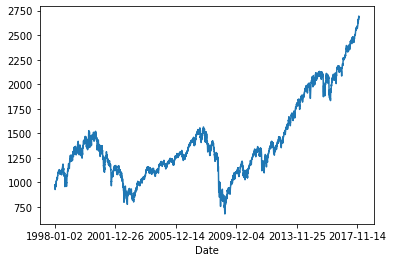

In [45]:
df_open.plot()